In [138]:
import scipy.io

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from math import sqrt
import random

In [139]:
#get data
Numpyfile= scipy.io.loadmat('AllSamples.mat')
data=Numpyfile.get('AllSamples')

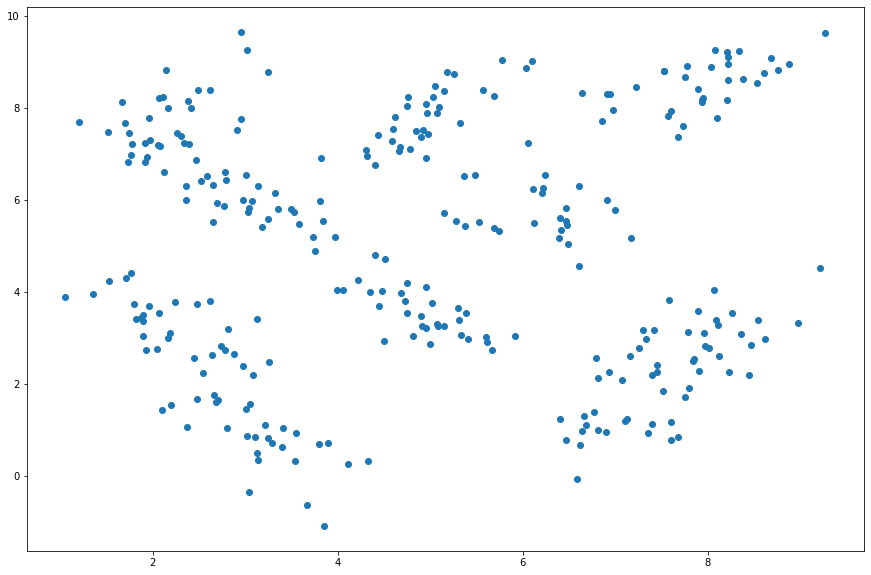

In [140]:
#Plot the data to get a feel of the scatter
plt.figure(figsize=(15,10))
plt.scatter(data[0:300,0],data[0:300,1])

In [141]:
def strategy1():
    obj=dict()
    #Run for clusters = 2-10
    init=np.zeros((1,2))
    #select 1st centroid randomly
    rand=random.randint(0,299)
    init[0]=data[rand]
    
    for k in range(2,11):
        centroids=init.copy()
        #choose subsequent centroids randomly for strategy 1
        while 1:
            rand=random.randint(0,299)
            if data[rand] not in init:
                init=np.append(init,[data[rand]],axis=0)
                centroids=init.copy()
                break
        
        done=False
        iters=0
        
        #run while max iterations reached or centroids stop changing
        while(not done and iters<300):    
            iters+=1;
            classifications=dict()

            for j in range(k):
                classifications[j]=[]
            
            #if data point is not already a centroid, calculate the centroid with min distance to this point
            #Classify the point to the cluster with this centroid
            for d in data:
                if d not in centroids:
                    dist=[np.linalg.norm(d-centroid) for centroid in centroids]
                    ind=dist.index(min(dist))
                    classifications[ind].append(d)
                
            prev_centroids=centroids.copy()
            #calculate new centroids by taking average of all the points in a each cluster
            for clas in classifications:
                if len(classifications[clas])>0:
                    centroids[clas]=np.average(classifications[clas],axis=0)
            
            #check if any of the centroids changed
            done=True
            if ((centroids-prev_centroids)!=0).any():
                done=False
        
        #calculate objective function for k clusters
        tot=0
        for clas in classifications:
            if len(classifications[clas])>0:
                tot+=np.sum([np.linalg.norm(c)**2 for c in classifications[clas]-centroids[clas]])
        obj[k]=tot
    
    #plot the objective function vs number of clusters graph
    fig=plt.figure(figsize=(12,8))
    plt.plot(list(obj.keys()),list(obj.values()),'bx-')
    fig.suptitle("Strategy 1", fontsize=18)
    plt.xlabel('Number of clusters', fontsize=16)
    plt.ylabel('Objective Function', fontsize=16)

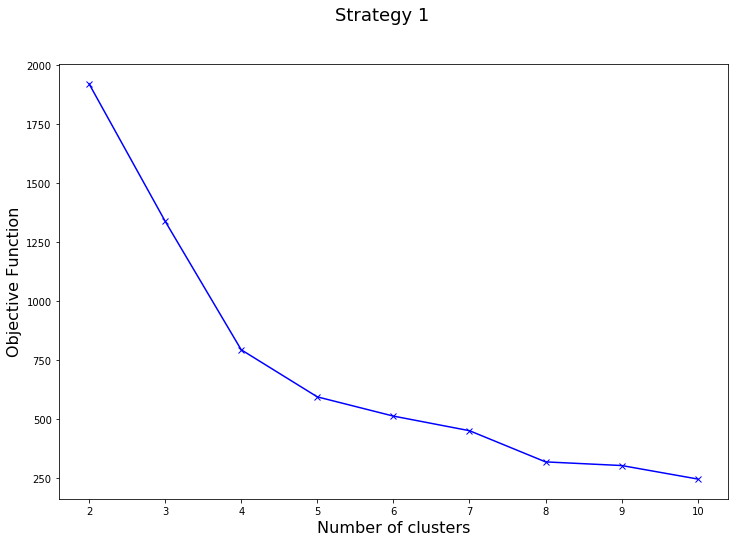

In [142]:
strategy1()

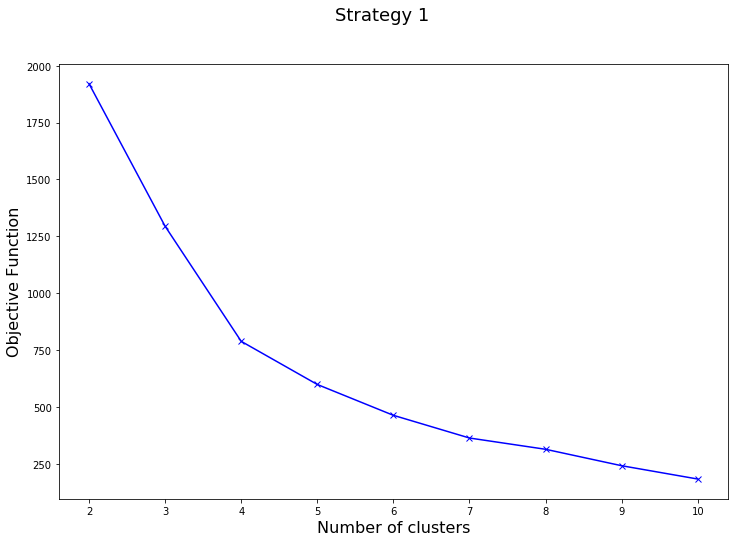

In [143]:
strategy1()

In [144]:
#get the average distance of all centroids from x
def getNextCentroid(x,centroids):
    m=0
    for j in centroids:
        m+=np.linalg.norm(x-j)
    return m/len(centroids)

In [145]:
def strategy2():
    obj=dict()
    #choose 1st centroid randomly
    init=np.zeros((1,2))
    rand=random.randint(0,299)
    init[0]=data[rand]
    
    #run for k clusters where k=2 to 10
    for k in range(2,11):
        
        #choose next centroid such that average of distance of all previous centroids to this point is maximum
        init=np.append(init,[max([x for x in data if x not in init],key=lambda x: getNextCentroid(x,init))],axis=0)
        centroids=init.copy()
        done=False
        iters=0
        
        #run while max iterations reached or centroids stop changing
        while(not done and iters<300):    
            iters+=1;
            classifications=dict()

            for j in range(k):
                classifications[j]=[]
            
            #if data point is not already a centroid, calculate the centroid with min distance to this point
            #Classify the point to the cluster with this centroid
            for d in data:
                if d not in centroids:
                    dist=[np.linalg.norm(d-centroid) for centroid in centroids]
                    ind=dist.index(min(dist))
                    classifications[ind].append(d)

            prev_centroids=centroids.copy()
            #calculate new centroids by taking average of all the points in a each cluster
            for clas in classifications:
                if len(classifications[clas])>0:
                    centroids[clas]=np.average(classifications[clas],axis=0)
            
            #check if any of the centroids changed
            done=True
            if ((centroids-prev_centroids)!=0).any():
                done=False
        
        #calculate objective function for k clusters
        tot=0
        for clas in classifications:
            if len(classifications[clas])>0:
                tot+=np.sum([np.linalg.norm(c)**2 for c in classifications[clas]-centroids[clas]])
        obj[k]=tot
    
    #plot objective function vs number of clusters graph
    fig=plt.figure(figsize=(12,8))
    plt.plot(list(obj.keys()),list(obj.values()),'bx-')
    fig.suptitle("Strategy 2", fontsize=18)
    plt.xlabel('Number of clusters', fontsize=16)
    plt.ylabel('Objective Function', fontsize=16)

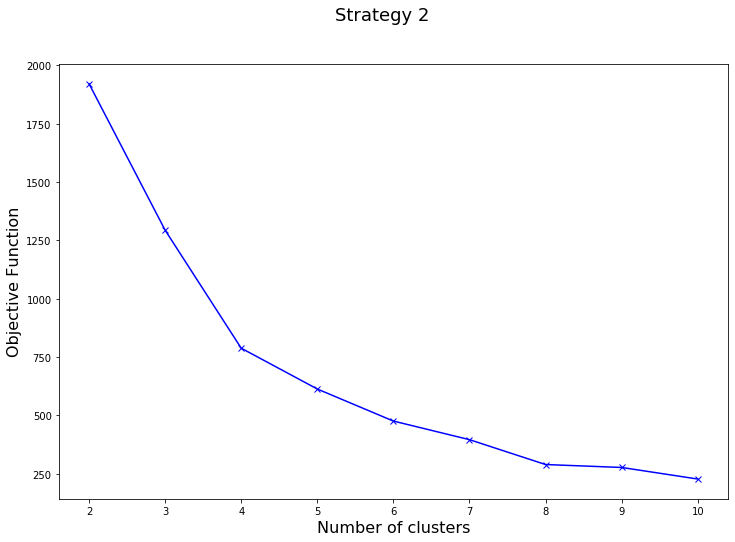

In [146]:
strategy2()

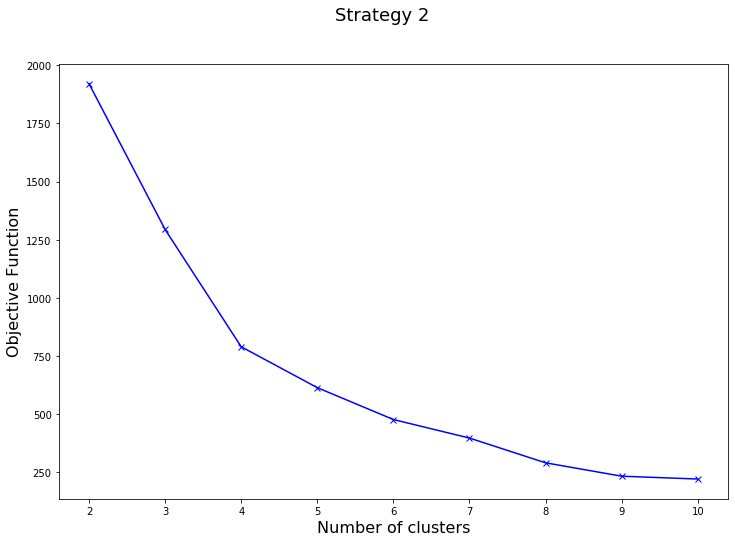

In [147]:
strategy2()